In [1]:
import numpy as np
import pandas as pd

In [10]:
x = pd.read_csv('./dataset/Logistic_X_Train.csv').values
y = pd.read_csv('./dataset/Logistic_Y_Train.csv').values
test = pd.read_csv('./dataset/Logistic_X_Test.csv').values
sample = pd.read_csv('./dataset/SampleOutput.csv')

In [11]:
x[:5]

array([[0.57472742, 0.78727745],
       [0.25150169, 0.90893952],
       [1.86057846, 0.01376293],
       [0.01947726, 1.04721023],
       [0.02979401, 0.2522357 ]])

In [21]:
y = np.reshape(y, (-1, ))

In [22]:
y.shape

(2250,)

In [23]:
test.shape

(750, 2)

In [24]:
sample.head()

,label
0,0
1,0
2,1
3,0
4,1


In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model = GaussianNB()

In [27]:
model.fit(x, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
model.score(x, y)

0.8675555555555555

In [29]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x, y)

/home/macab/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.score(x, y)

0.8675555555555555

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=7)

In [78]:
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [79]:
knn.score(x, y)

0.9702222222222222

In [80]:
predictions = knn.predict(test)

In [81]:
pd.DataFrame(data = predictions, columns=['label'], index=None).to_csv('submission3.csv', index=None)

### visualizing the data

In [84]:
import matplotlib.pyplot as plt

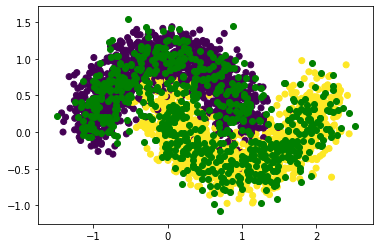

In [97]:
plt.scatter(x[:, 0], x[:, 1], c=y);
plt.scatter(test[:, 0], test[:, 1], c='green');

In [108]:
from sklearn.tree import  DecisionTreeClassifier

In [109]:
dtc = DecisionTreeClassifier()

In [110]:
dtc.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [112]:
dtc.score(x, y)

1.0

In [113]:
tree_pred = dtc.predict(test)

In [114]:
pd.DataFrame(data = tree_pred, columns=['label'], index=None).to_csv('submission3.csv', index=None)

In [115]:
from sklearn.svm import SVC

In [116]:
sv = SVC()

In [117]:
sv.fit(x, y)

/home/macab/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
sv.score(x, y)

0.96

In [119]:
sv_pred =  sv.predict(test)

In [120]:
pd.DataFrame(data = sv_pred, columns=['label'], index=None).to_csv('submission3.csv', index=None)